In [20]:
# import json
# import pprint
import pandas as pd
import numpy as np
import csv
import os
import glob
import chardet
import matplotlib.pyplot as plt

extension = 'csv'
# years = [2016, 2017, 2018, 2019, 2020]
years = [2016]
csv_data_path = r"D:\Python\IFT6758\CSV_data"
visualize_path = r"D:\Python\IFT6758\Visualize"

In [19]:
# Check the encoding type
# with open(r'D:\Python\IFT6758\CSV_data\playoffs\2016\2016030111.csv', 'rb') as f:
#     result = chardet.detect(f.read()) # or readline if the file is large
#     print(result['encoding'])
       # return ISO-8859-1

In [83]:
for year in years:
    # Combine all .csv files for playoffs
    # set working directory for playoffs + year
    os.chdir(fr"{csv_data_path}\playoffs\{year}")

    # use glob to match the pattern 'csv'
    all_files = [i for i in glob.glob('*.{}'.format(extension))]

    # combine all files in the list
    # set encoding to 'ISO-8859-1' per the previous catching return
    combined_csv = pd.concat([pd.read_csv(f, encoding='ISO-8859-1') for f in all_files])

    os.chdir(visualize_path)
    combined_csv.to_csv(f"{year}_playoffs.csv", index=False, encoding='ISO-8859-1')

    # Combine all .csv files for regular_season
    # set working directory for regular_season + year
    os.chdir(fr"{csv_data_path}\regular_season\{year}")

    # use glob to match the pattern 'csv'
    all_files = [i for i in glob.glob('*.{}'.format(extension))]

    # combine all files in the list
    # set the encoding to 'ISO-8859-1' per the previous catching return
    combined_csv = pd.concat([pd.read_csv(f, encoding='ISO-8859-1') for f in all_files])

    os.chdir(visualize_path)
    combined_csv.to_csv(f"{year}_regular_season.csv", index=False, encoding='ISO-8859-1')

    # Combine two intermediate .csv files
    combine_files = [f"{year}_playoffs.csv", f"{year}_regular_season.csv"]
    combined_csv = pd.concat([pd.read_csv(f, encoding='ISO-8859-1') for f in combine_files])
    combined_csv.to_csv(f"{year}.csv", index=False, encoding='ISO-8859-1')


In [102]:
df = pd.read_csv(r'D:\Python\IFT6758\Visualize\2018.csv', encoding='ISO-8859-1')
df.head(10)

,eventIdx,Date & Time,Period,Period Time,Period Time Remaining,Period Type,Game ID,Team Name,Home or Away,Shot or Goal,X-Coordinate,Y-Coordinate,Shooter Name,Goalie Name,Scorer Name,Shot Type,Was Net Empty,Goalie Strength
0,8,2019-04-10T23:12:20Z,1,00:30,19:30,REGULAR,2018030111,Columbus Blue Jackets,Away,Shot,-57.0,29.0,Cam Atkinson,Andrei Vasilevskiy,NaN,Wrist Shot,False,NaN
1,22,2019-04-10T23:17:35Z,1,03:01,16:59,REGULAR,2018030111,Columbus Blue Jackets,Away,Shot,-44.0,18.0,Cam Atkinson,Andrei Vasilevskiy,NaN,Wrist Shot,False,NaN
2,25,2019-04-10T23:18:45Z,1,04:12,15:48,REGULAR,2018030111,Tampa Bay Lightning,Home,Goal,80.0,-8.0,Cam Atkinson,Sergei Bobrovsky,Alex Killorn,Backhand,False,Short Handed
3,30,2019-04-10T23:21:27Z,1,06:15,13:45,REGULAR,2018030111,Tampa Bay Lightning,Home,Shot,73.0,0.0,J.T. Miller,Sergei Bobrovsky,NaN,Wrist Shot,False,NaN
4,35,2019-04-10T23:22:21Z,1,07:09,12:51,REGULAR,2018030111,Columbus Blue Jackets,Away,Shot,-8.0,-33.0,Ryan Dzingel,Andrei Vasilevskiy,NaN,Wrist Shot,False,NaN
5,45,2019-04-10T23:27:13Z,1,09:12,10:48,REGULAR,2018030111,Columbus Blue Jackets,Away,Shot,-36.0,18.0,Brandon Dubinsky,Andrei Vasilevskiy,NaN,Wrist Shot,False,NaN
6,51,2019-04-10T23:31:15Z,1,10:59,09:01,REGULAR,2018030111,Tampa Bay Lightning,Home,Shot,37.0,-5.0,Erik Cernak,Sergei Bobrovsky,NaN,Slap Shot,False,NaN
7,52,2019-04-10T23:31:23Z,1,11:01,08:59,REGULAR,2018030111,Tampa Bay Lightning,Home,Goal,70.0,3.0,Erik Cernak,Sergei Bobrovsky,Anthony Cirelli,Wrist Shot,False,Even
8,61,2019-04-10T23:34:25Z,1,12:47,07:13,REGULAR,2018030111,Tampa Bay Lightning,Home,Shot,78.0,13.0,Brayden Point,Sergei Bobrovsky,NaN,Backhand,False,NaN
9,71,2019-04-10T23:36:48Z,1,13:46,06:14,REGULAR,2018030111,Tampa Bay Lightning,Home,Shot,72.0,-7.0,Anthony Cirelli,Sergei Bobrovsky,NaN,Tip-In,False,NaN


In [103]:
# Group by 'Shot Type' and 'Shot or Goal', add a 'Count' for the sum up
df['Count'] = 1
group_data = df.groupby(['Shot Type', 'Shot or Goal'])['Count'].sum().reset_index(name="Count")
print(group_data)

      Shot Type Shot or Goal  Count
0      Backhand         Goal    824
1      Backhand         Shot   6171
2     Deflected         Goal    264
3     Deflected         Shot   1413
4     Slap Shot         Goal    783
5     Slap Shot         Shot  11458
6     Snap Shot         Goal   1213
7     Snap Shot         Shot  10750
8        Tip-In         Goal    770
9        Tip-In         Shot   3728
10  Wrap-around         Goal     60
11  Wrap-around         Shot    827
12   Wrist Shot         Goal   4322
13   Wrist Shot         Shot  43287


<AxesSubplot:xlabel='Shot Type'>

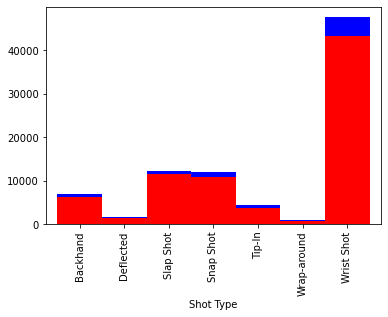

In [104]:
# Generate the figure for Q5.1
# group_data.pivot("Shot Type","Shot or Goal","Count")[["Shot", "Goal"]].plot.bar(stacked=True, color=["blue", "red"], legend=False)
group_data.pivot("Shot Type","Shot or Goal","Count")[["Shot", "Goal"]].plot.bar(stacked=True, color=["red", "blue"], legend=False, width=1)